In [18]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='hysteresis')


def Hval(point):
    x, y, z = point
    
    if x < 0:
        return (0, 0, 1e6)
    else:
        return (0, 0, 1e6)

H = df.Field(mesh, dim=3, value=Hval)

system.energy = mm.Exchange(A=1e-12) + mm.Demag() + mm.UniaxialAnisotropy(K=1e3, u=(0, 0, 1)) + \
   mm.DMI(D=1e-4, crystalclass='Cnv') + mm.Zeeman(H=(0, 0, 1e2)) + mm.CubicAnisotropy(K=1e2, u1=(0, 0, 1), u2=(0, 1, 0))
Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 19:08]... (1.6 s)


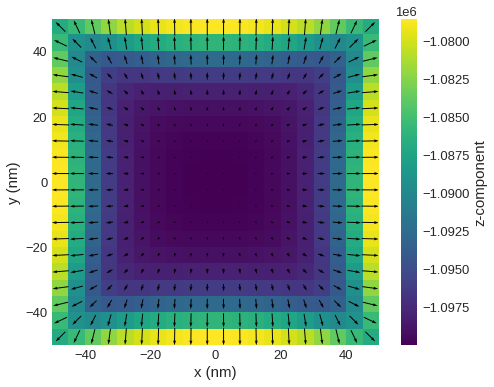

In [19]:
Hmin = (0, 0, -1e6)
Hmax = (0, 0, 1e6)
n = 10

# minimize the energy
hd = mc.HysteresisDriver()
hd.drive(system, Hmin=Hmin, Hmax=Hmax, n=n)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [17]:
system.table

   max_mxHxm             E       delta_E  bracket_count  line_min_count  \
0   0.063313 -7.751637e-17 -2.465190e-31           67.0            15.0   
1   0.090146  9.518639e-18 -1.432892e-31          130.0            45.0   
2   0.053216 -7.754381e-17 -1.725633e-31          169.0            58.0   
3   0.099077  1.178142e-18 -2.634672e-31          333.0           117.0   
4   0.080503 -7.751637e-17 -2.465190e-32          390.0           152.0   

   conjugate_cycle_count  cycle_count  cycle_sub_count  energy_calc_count  \
0                   45.0         60.0             15.0               83.0   
1                   68.0        113.0             27.0              177.0   
2                   88.0        146.0             13.0              230.0   
3                  163.0        281.0             25.0              454.0   
4                  175.0        328.0             35.0              547.0   

     E_exchange  ...            B   Bx   By           Bz  iteration  \
0  1.252104e-19

In [4]:
system.m.orientation((-20e-9, 0, 0))

(-0.043787190580416566, 0.0028442060937944225, -0.9990368323704437)

In [5]:
system.table

   max_mxHxm             E       delta_E  bracket_count  line_min_count  \
0   0.069578 -7.752901e-17 -9.860761e-32           63.0            13.0   
1   0.066705  9.425059e-18 -5.885642e-31          123.0            39.0   
2   0.091623 -7.752901e-17 -3.204747e-31          162.0            52.0   
3   0.076036  1.078287e-18 -9.032611e-32          322.0           105.0   
4   0.087125 -7.752901e-17 -1.232595e-32          381.0           138.0   

   conjugate_cycle_count  cycle_count  cycle_sub_count  energy_calc_count  \
0                   44.0         56.0             12.0               77.0   
1                   67.0        105.0             24.0              164.0   
2                   86.0        137.0             13.0              217.0   
3                  162.0        266.0             25.0              431.0   
4                  174.0        314.0             36.0              524.0   

     E_exchange  ...            B   Bx   By           Bz  iteration  \
0  1.260404e-19

In [6]:
system.table.mpl(yaxis=['mz'])

ValueError: Cannot plot table data with no time column.

In [ ]:
system.table

In [ ]:
import micromagneticmodel as mm

In [ ]:
mm.__version__

In [ ]:
a = ['r1', 'r2']
f'{{main_atlas {" ".join(a)}}}'